# SYS ENG 6213 - Deep Learning and Advanced Neural Networks 

### Homework#2 Exploring the advantages of regularization

In machine learning, a well trained model performs equally good on test data as it did on training data. However, test data is not usually available during training which makes it difficult to understand how the model is performing. For example, we may get an accuracy of 99% for some model on training data but when it is deployed on real unseen data, it may not give the same performance. For this reason, we separate the available training data into training and validation data. 


In order to create above mentioned situation, let us limit the training data to only 50000 samples for MNIST dataset while keeping the validation to 10000 samples. Run the code given in the demo and observe how the model performs.

__In this assignment, you will work only with layers.py file. We provided the model.py file which contains a wrapper funtion to create $n$-layered neural network.__



### 1. Demo

Run the below code to observe how the model performs when there is no regularization.

In [1]:
# Import the functions
from layers import *
from utils import *
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


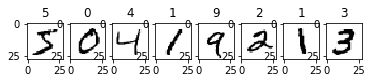

In [2]:
# Load the training data
inputs, labels = load_images_with_labels()

# View first 8 examples
fig, ax = plt.subplots(1,8)
labl = []
for i in range(8):
    ax[i].imshow(inputs[i], cmap=mpl.cm.Greys)
    ax[i].set_title(labels[i])
plt.show()

In [3]:
# Pre-processing the data
train=inputs.reshape(60000,784) # reshape the inputs shape from (60000,28,28) to (60000,784)
train = np.float32(train) # change the datatype to float
train /= np.max(train,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

# Now we separate the inputs into training and validation
train_ = train[0:50000,:] # We use first 50000 images for training
tr_labels = labels[0:50000]
val = train[50000:60000,:] # We use the last 10000 images for validation
val_labels = labels[50000:60000]
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}


In [4]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,reg=0)

In [5]:
# Train the two layered neural network
_,_,train_acc_history,val_acc_history=model.train()

***************************************************************
|                  Model Specifications:                      |
***************************************************************
input dimensions         :(50000, 784)
output dimensions        :10
number of hidden layers  :2
hidden layer dimensions  :[100, 100]
learning rate            :0.01
batch size               :50
number of epochs         :70
---------------------------------------------------------------
regularization type      :None
---------------------------------------------------------------
Epoch 0/70
Train accuracy: 0.84054 Validation accuracy: 0.8484
Epoch 1/70
Train accuracy: 0.88022 Validation accuracy: 0.8855
Epoch 2/70
Train accuracy: 0.8965 Validation accuracy: 0.9048
Epoch 3/70
Train accuracy: 0.90768 Validation accuracy: 0.91
Epoch 4/70
Train accuracy: 0.9162 Validation accuracy: 0.9166
Epoch 5/70
Train accuracy: 0.91868 Validation accuracy: 0.92
Epoch 6/70
Train accuracy: 0.92756 Validation accuracy:

In [6]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))

Best accuracy on training data: 0.989
Best accuracy on test data :0.9599


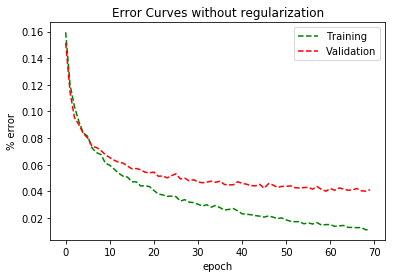

In [7]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves without regularization')
plt.show()

From the above graphs, you will observe that during training, the accuracy on training data reached $\sim$ 98-100% while the validation accuracy only reached $\sim$ 95-97%. This is an example of over-fitting as the trained model performs very well on training data but cannot perform equally on new unseen data(like validation/test). An ideal model should have the training,validation and test accuracy almost similar. In order to get such a model, we use regularization. 

 ####  ------------------------------------------------------------------------- END OF DEMO -------------------------------------------------------------------------------

### 2. $L2$ Regularization

To reduce over fitting shown in the above demo, you will now implement the $L2$ regularization and observe how the model performs.

In [ ]:
# Reset to remove all the clear all variables
%reset

Below is a paper to better understand $L2$:
    
https://papers.nips.cc/paper/563-a-simple-weight-decay-can-improve-generalization.pdf

__Implementation__

Open the layers.py file an update the code for following functions:
1. loss
2. backward_step

You will have to implement L2 regularization in both functions using the equations given below:

1. If $L$ is loss calculated using normal loss function, then the loss with regularization 
__$L = L + \frac{reg*(\sum_{n=1}^{N} {w_n^2})}{N}$__
2. If __$\delta_n$__ is the gradient of wegtht __$w_n$__, then by adding regularization, the values will be __$\delta_n = \delta_n + reg * w_n$__

In [ ]:
# Import the functions
from layers import *
from utils import *
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Load the training data
inputs, labels = load_images_with_labels()

# View first 8 examples
fig, ax = plt.subplots(1,8)
labl = []
for i in range(8):
    ax[i].imshow(inputs[i], cmap=mpl.cm.Greys)
    ax[i].set_title(labels[i])
plt.show()

In [ ]:
# Pre-processing the data
train=inputs.reshape(60000,784) # reshape the inputs shape from (60000,28,28) to (60000,784)
train = np.float32(train) # change the datatype to float
train /= np.max(train,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

# Now we separate the inputs into training and validation
train_ = train[0:50000,:] # We use first 50000 images for training
tr_labels = labels[0:50000]
val = train[50000:60000,:] # We use the last 10000 images for validation
val_labels = labels[50000:60000]
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type='L2',learning_rate=0.01,reg=0.01)

In [ ]:
# Train the two layered neural network
_,_,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves with L2 regularization')
plt.show()

By implementing the $L2$ regularization, you should get the final training accuracy $\sim$ 95-96% and validation accuracy $\sim$ 95-96%. 

### 3. Dropout 

In [ ]:
%reset

Dropout is a regularization technique developed by Nitish Srivastava in 2014. The idea is to randomly drop units (hidden neurons) during training. This introduces noise in the model and prevents it from co-adapting to the training data too much. 


![Dropout](dropout_img.png)

The image is taken from original dropout paper: 
https://arxiv.org/pdf/1502.03167.pdf . You can also read from the paper to get better idea on dropout.



Now complete the following functions in layers.py
1. dropout_forward  
2. dropout_backward 

Note: 
1. Dropout is used only during training since it aims to generalize the model weights. 
2. The $p$ = 0.8 in the code is the keep probability i.e. each neuron has a probability of 0.8 to participate in an iteration during training.


In [ ]:
# Import the functions
from layers import *
from utils import *
# Set up the packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
# Load the training data
inputs, labels = load_images_with_labels()

# View first 8 examples
fig, ax = plt.subplots(1,8)
labl = []
for i in range(8):
    ax[i].imshow(inputs[i], cmap=mpl.cm.Greys)
    ax[i].set_title(labels[i])
plt.show()

In [ ]:
# Pre-processing the data
train=inputs.reshape(60000,784) # reshape the inputs shape from (60000,28,28) to (60000,784)
train = np.float32(train) # change the datatype to float
train /= np.max(train,axis=1).reshape(-1,1) # Normalize the data between 0 and 1

# Now we separate the inputs into training and validation
train_ = train[0:50000,:] # We use first 50000 images for training
tr_labels = labels[0:50000]
val = train[50000:60000,:] # We use the last 10000 images for validation
val_labels = labels[50000:60000]
data = {'train':train_,'tr_targets':tr_labels,'val':val,'tr_val':val_labels}

In [ ]:
# Initialize two_layered_NN instance
from n_model import n_layered_NN
model = n_layered_NN(data,regularization_type='dropout',learning_rate=0.01)

In [ ]:
# Train the two layered neural network
_,_,train_acc_history,val_acc_history=model.train()

In [ ]:
# print best accuracies
print('Best accuracy on training data: '+str(np.max(train_acc_history)))
print('Best accuracy on test data :'+str(np.max(val_acc_history)))

In [ ]:
# Plot the accuracy curves
plt.plot(np.subtract(1,train_acc_history),'g--',label='Training')
plt.plot(np.subtract(1,val_acc_history),'r--',label='Validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('% error')
plt.title('Error Curves with dropout')
plt.show()

You should get similar performance as that of $L2$ regularization